In [109]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.losses import MeanSquaredError
from tensorflow.python.keras.metrics import RootMeanSquaredError
from sklearn.metrics import mean_absolute_error 
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras_tuner import RandomSearch
from math import sqrt
from sklearn.metrics import mean_squared_error
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [111]:
inf_data1 = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\Documents\Mini_Project_2\Mini_Project2_Data.csv")
inf_data1.head()

,season,date_code,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,200940,10-10-2009,Bay Area,Influenza_A,36,220,16.36
1,2009-2010,200940,10-10-2009,Bay Area,Influenza_B,0,220,0.00
2,2009-2010,200940,10-10-2009,Bay Area,Total_Influenza,36,220,16.36
3,2009-2010,200940,10-10-2009,Bay Area,RSV,0,190,0.00
4,2009-2010,200940,10-10-2009,California,Influenza_A,1077,3324,32.40


In [112]:
inf_data1.isnull().sum()

season                  0
date_code               0
weekending              0
region                  0
respiratory_virus       0
number_positive         0
specimens_tested        0
percent_positive     7597
dtype: int64

In [113]:
inf_data1 = inf_data1.dropna()
inf_data1.isnull().sum()

season               0
date_code            0
weekending           0
region               0
respiratory_virus    0
number_positive      0
specimens_tested     0
percent_positive     0
dtype: int64

In [114]:
inf_data1['region'].value_counts()

California              7137
Central                 7121
Upper Southern          6999
Bay Area                5817
Lower Southern          5744
Northern                5140
Upper/Lower Southern    4404
Northern/Bay Area         52
Name: region, dtype: int64

In [115]:
inf_data1['season'].value_counts()

2018-2019    6045
2019-2020    6024
2017-2018    5931
2016-2017    5754
2015-2016    5608
2014-2015    4551
2013-2014    3460
2010-2011    1339
2011-2012    1261
2009-2010    1224
2012-2013    1217
Name: season, dtype: int64

In [116]:
inf_data1['respiratory_virus'].value_counts()

Influenza_A                  3668
Influenza_B                  3668
Total_Influenza              3668
RSV                          3641
Enterovirus_Rhinovirus       2322
Total_Parainfluenza          2321
Parainfluenza_UnknownType    2321
Parainfluenza_4              2321
Parainfluenza_3              2321
Parainfluenza_2              2321
Parainfluenza_1              2321
Adenovirus                   2320
HMPV                         2313
Coronavirus_HKU1             1148
Coronavirus_NL63             1148
Coronavirus_OC43             1148
Coronavirus_229E             1148
Coronavirus_UnknownType      1148
Total_Coronavirus            1148
Name: respiratory_virus, dtype: int64

In [117]:
inf_data1 = inf_data1.drop(['date_code'], axis = 1)

In [118]:
pd.set_option('mode.chained_assignment', None)

In [119]:
df1 = inf_data1.loc[inf_data1['respiratory_virus'] == 'Influenza_A'].copy()
df2 = inf_data1.loc[inf_data1["respiratory_virus"] == "RSV"].copy()
df3 = inf_data1.loc[inf_data1["respiratory_virus"] == "Adenovirus"].copy()
df4 = inf_data1.loc[inf_data1["respiratory_virus"] == "HMPV"].copy()

In [120]:
inf_df1 = pd.concat([df2, df1], ignore_index = True, axis = 0)
inf_df2 = pd.concat([inf_df1, df3], ignore_index = True, axis = 0)
inf_df3 = pd.concat([inf_df2, df4], ignore_index = True, axis = 0)
inf_df3.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
0,2009-2010,10-10-2009,Bay Area,RSV,0,190,0.00
1,2009-2010,10-10-2009,California,RSV,2,2218,0.09
2,2009-2010,10-10-2009,Central,RSV,0,329,0.00
3,2009-2010,10-10-2009,Lower Southern,RSV,0,35,0.00
4,2009-2010,10-10-2009,Northern/Bay Area,RSV,2,1510,0.13


In [121]:
inf_df3['respiratory_virus'].value_counts()

Influenza_A    3668
RSV            3641
Adenovirus     2320
HMPV           2313
Name: respiratory_virus, dtype: int64

## ***CALIFORNIA***

In [122]:
df_reg1 = inf_df3.loc[inf_df3['region'] == 'California'].copy()
df_reg1.head()

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
1,2009-2010,10-10-2009,California,RSV,2,2218,0.09
8,2009-2010,17-10-2009,California,RSV,8,2764,0.29
14,2009-2010,24-10-2009,California,RSV,1,2615,0.04
20,2009-2010,31-10-2009,California,RSV,8,2085,0.38
26,2009-2010,07-11-2009,California,RSV,5,1739,0.29


In [123]:
df_reg1_rv1 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Influenza_A']
df_reg1_rv1

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
3642,2009-2010,10-10-2009,California,Influenza_A,1077,3324,32.40
3649,2009-2010,17-10-2009,California,Influenza_A,1457,3693,39.45
3655,2009-2010,24-10-2009,California,Influenza_A,1398,3642,38.39
3661,2009-2010,31-10-2009,California,Influenza_A,985,3013,32.69
3667,2009-2010,07-11-2009,California,Influenza_A,811,2771,29.27
...,...,...,...,...,...,...,...
7280,2019-2020,29-08-2020,California,Influenza_A,0,398,0.00
7286,2019-2020,05-09-2020,California,Influenza_A,0,367,0.00
7292,2019-2020,12-09-2020,California,Influenza_A,0,397,0.00
7298,2019-2020,19-09-2020,California,Influenza_A,1,463,0.22


### **Influenza A**

In [124]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
df_r11 = df_reg1_rv1[['weekending', 'percent_positive']]
df_r11['InfA_PP'] = df_r11['percent_positive']
df_r11 = df_r11.drop(['percent_positive'], axis = 1)
df_r11['Year'] = pd.DatetimeIndex(df_r11['weekending']).year
df_r11.head()

,weekending,InfA_PP,Year
3642,10-10-2009,32.40,2009
3649,17-10-2009,39.45,2009
3655,24-10-2009,38.39,2009
3661,31-10-2009,32.69,2009
3667,07-11-2009,29.27,2009


In [126]:
df_r11['InfA_PP'].describe()

count    573.000000
mean       4.990576
std        7.540275
min        0.000000
25%        0.420000
50%        1.150000
75%        6.380000
max       39.450000
Name: InfA_PP, dtype: float64

In [127]:

df_r11.head()

,weekending,InfA_PP,Year
3642,10-10-2009,32.40,2009
3649,17-10-2009,39.45,2009
3655,24-10-2009,38.39,2009
3661,31-10-2009,32.69,2009
3667,07-11-2009,29.27,2009


In [128]:
df_r11.set_index('Year', drop = True, inplace = True)
df_r11.head()

,weekending,InfA_PP
Year,,
2009,10-10-2009,32.40
2009,17-10-2009,39.45
2009,24-10-2009,38.39
2009,31-10-2009,32.69
2009,07-11-2009,29.27


In [129]:
df_r11 = df_r11.drop(['weekending'], axis = 1)

## **LSTM MODEL**

In [130]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)

In [131]:
window_size = 5
X_r11, y_r11 = df_to_X_y(df_r11, window_size)
X_r11.shape, y_r11.shape

((568, 5, 1, 1), (568, 1))

In [132]:
X_train_r11, y_train_r11 = X_r11[:250], y_r11[:250]
X_val_r11, y_val_r11 = X_r11[250:400], y_r11[250:400]
X_test_r11, y_test_r11 = X_r11[400:], y_r11[400:]

X_train_r11.shape, y_train_r11.shape, X_test_r11.shape, y_test_r11.shape, X_val_r11.shape, y_val_r11.shape 

((250, 5, 1, 1), (250, 1), (168, 5, 1, 1), (168, 1), (150, 5, 1, 1), (150, 1))

In [133]:

def build_model(hp):                 #hp means hyper parameters
    model=Sequential()
    model.add(Flatten(input_shape=(5, 1)))
    #providing the range for hidden layers  
    for i in range(hp.Int('num_of_layers',2,20)):         
        #providing range for number of neurons in hidden layers
        model.add(Dense(units=hp.Int('num_of_neurons'+ str(i),min_value=32,max_value=512,step=32),
                                    activation='relu'))
    model.add(Dense(1,activation='relu'))    #output layer
    #compiling the model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[0.1, 0.01, 0.001, 0.0001])),   #tuning learning rate
                  loss='mae',metrics=[RootMeanSquaredError()])
    return model
    

In [134]:
import keras_tuner as kt
import tensorflow as tf
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_loss",
                     max_epochs=20,
                     directory="kt_dir",
                     project_name="kt_hyperband",)


INFO:tensorflow:Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


In [135]:
# summary of tuner
tuner.search_space_summary()

Search space summary
Default search space size: 20
num_of_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
num_of_neurons0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}
num_of_neurons2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_of_neurons5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max

In [136]:
# Tunner search
tuner.search(X_train_r11, y_train_r11, epochs = 10, validation_data = (X_val_r11, y_val_r11))
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r11 = optimum_model.fit(X_train_r11, y_train_r11, epochs = nb_epochs,validation_data = (X_val_r11, y_val_r11) ).history



INFO:tensorflow:Oracle triggered exit
Epoch 1/25
8/8 [==============================] - 1s 23ms/step - loss: 2.4778 - root_mean_squared_error: 4.5067 - val_loss: 1.7686 - val_root_mean_squared_error: 4.2433
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 1.4820 - root_mean_squared_error: 3.7669 - val_loss: 1.0648 - val_root_mean_squared_error: 3.4244
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 1.3072 - root_mean_squared_error: 3.2160 - val_loss: 1.0404 - val_root_mean_squared_error: 3.1012
Epoch 4/25
8/8 [==============================] - 0s 8ms/step - loss: 1.1959 - root_mean_squared_error: 2.9551 - val_loss: 1.3322 - val_root_mean_squared_error: 2.8671
Epoch 5/25
8/8 [==============================] - 0s 8ms/step - loss: 1.0538 - root_mean_squared_error: 2.7765 - val_loss: 0.9934 - val_root_mean_squared_error: 2.7128
Epoch 6/25
8/8 [==============================] - 0s 7ms/step - loss: 0.9576 - root_mean_squared_error: 2.6494 - val_loss

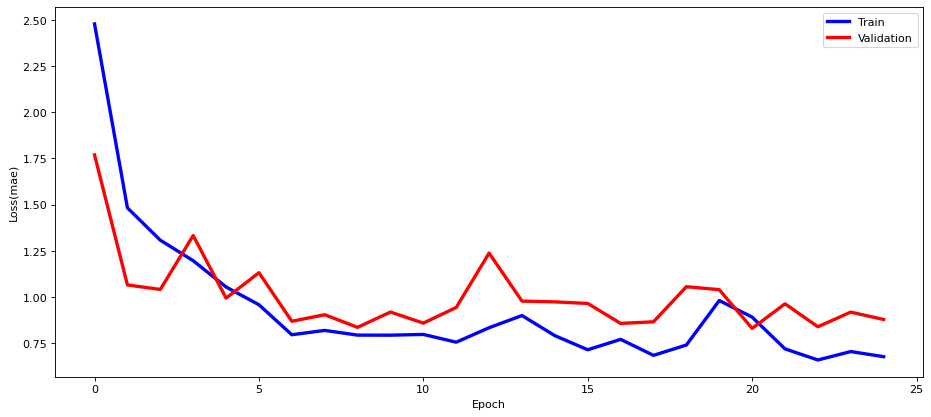

In [137]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_loss'], 'r', label = 'Validation', linewidth = 3)
ax.set_title('', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

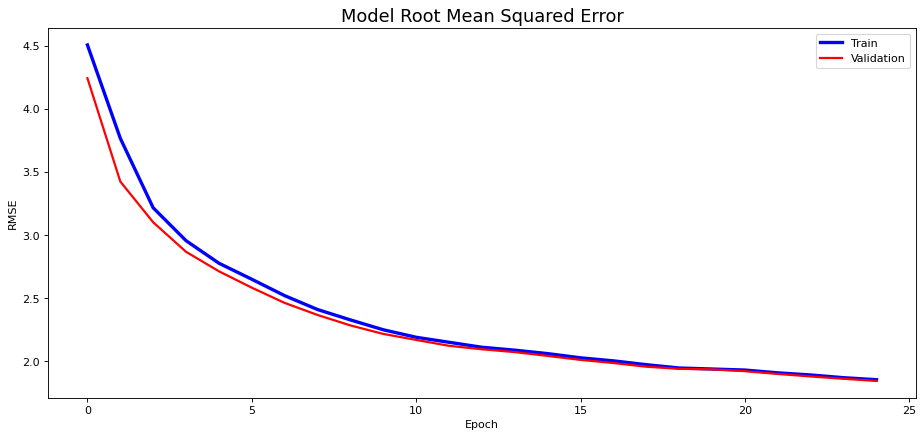

In [138]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r11['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r11['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


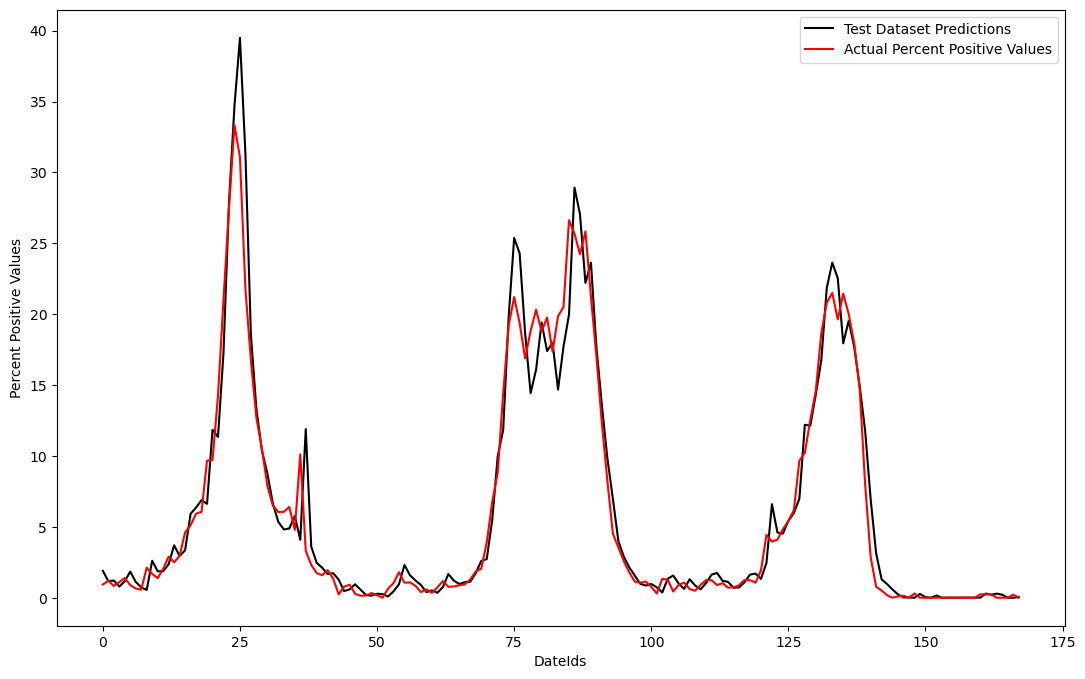

In [139]:
test_pred_r11 = optimum_model.predict(X_test_r11).flatten()
test_results_r11 = pd.DataFrame(data={'Test Predictions': test_pred_r11, 'Actual Percent Positive Values':y_test_r11.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r11['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r11['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [140]:
error_r11= mean_squared_error(y_test_r11, test_pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r11))

mae_r11 = mean_absolute_error(y_test_r11, test_pred_r11)
print("Mean Absolute Error: ", mae_r11)


RootMeanSquaredError:  1.9909117081004903
Mean Absolute Error:  1.1417192745574616


# SARIMA Model


<Figure size 1000x1400 with 0 Axes>

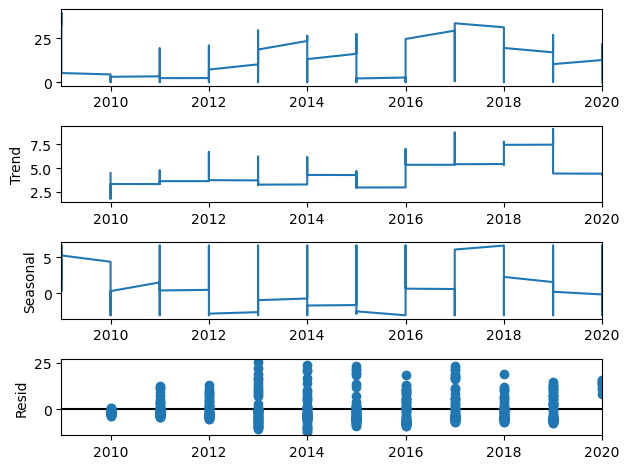

<Figure size 1000x1400 with 0 Axes>

In [141]:
seasonal_decompose(df_r11, model='=addittive', period = 60).plot();
plt.figure(figsize = (10,14))

In [142]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')


In [143]:
adf_test(df_r11['InfA_PP'])

1. ADF :  -8.131201294874145
2. P-Value :  1.0890607616334502e-12
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression: 570
5. Critical Values :
	 1% :  -3.441874550188182
	 5% :  -2.8666239496633246
	 10% :  -2.569477593105571
The series is stationary


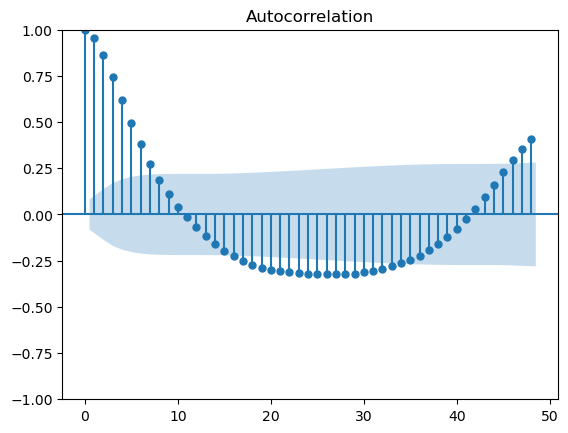

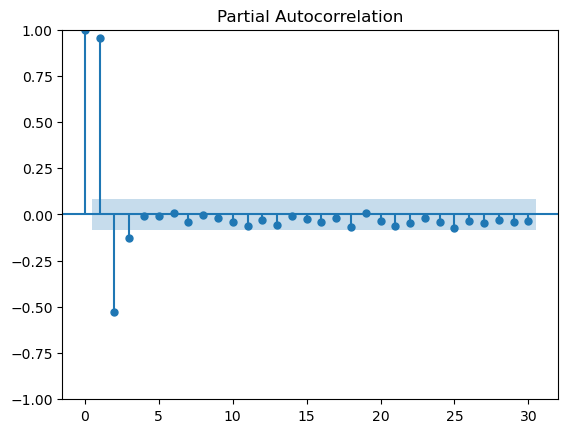

In [144]:
plot_acf(df_r11['InfA_PP'], lags=48);
plot_pacf(df_r11['InfA_PP'], lags=30);

In [145]:
from tqdm import tqdm_notebook

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [146]:
from itertools import product
p = q = P = Q = range(0, 2, 1)
d = 0
D = 0
s = 4
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

16


In [147]:
import warnings
  

warnings.filterwarnings('ignore')

In [148]:
result_df_r11 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r11['InfA_PP'])
result_df_r11


  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 1, 1)",2264.510055
1,"(1, 1, 0, 0)",2273.235862
2,"(1, 1, 0, 1)",2275.235110
3,"(1, 1, 1, 0)",2275.235272
4,"(1, 0, 1, 1)",2399.316905
5,"(1, 0, 0, 0)",2422.881817
6,"(1, 0, 0, 1)",2424.185954
7,"(1, 0, 1, 0)",2424.420651
8,"(0, 1, 1, 1)",2923.562888
9,"(0, 1, 1, 0)",2967.846533


In [41]:
best_model_r11 = SARIMAX(df_r11['InfA_PP'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 4)).fit(dis=-1)
print(best_model_r11.summary())


                                     SARIMAX Results                                     
Dep. Variable:                           InfA_PP   No. Observations:                  573
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood               -1127.255
Date:                           Thu, 02 Feb 2023   AIC                           2264.510
Time:                                   22:05:22   BIC                           2286.264
Sample:                                        0   HQIC                          2272.996
                                           - 573                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9898      0.005    183.255      0.000       0.979       1.000
ma.L1          0.4216      0.027     15.386

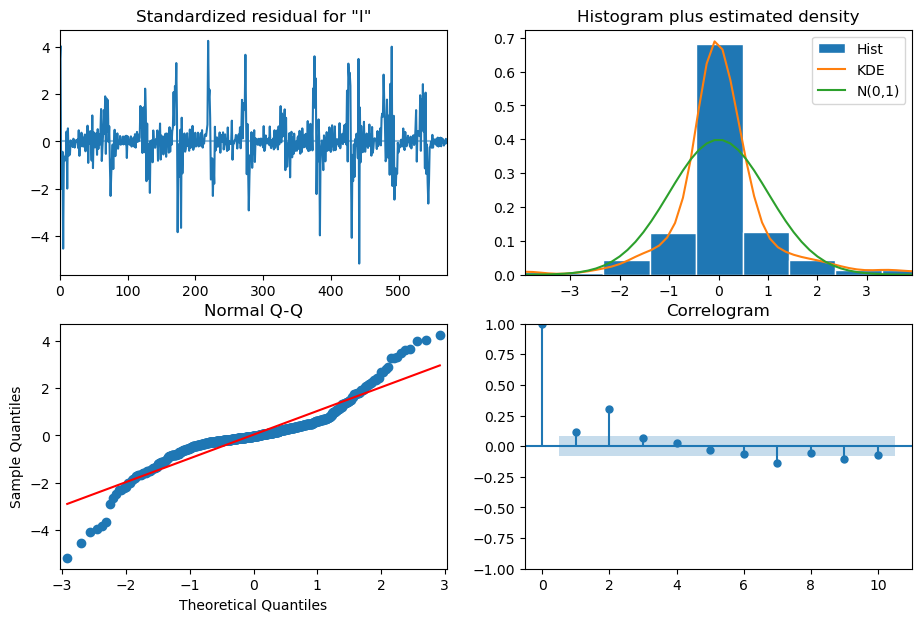

In [149]:
best_model_r11.plot_diagnostics(figsize=(11,7));

In [150]:
pred_r11 = best_model_r11.predict()

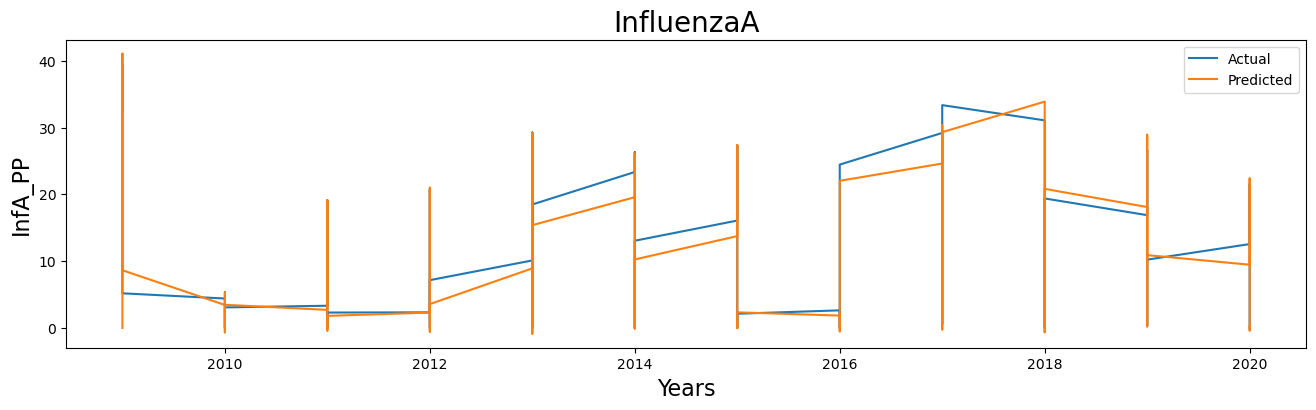

In [151]:
plt.figure(figsize=(16,4))
plt.plot(df_r11['InfA_PP'], label="Actual")
plt.plot(pred_r11, label="Predicted")
plt.title('InfluenzaA', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('InfA_PP', fontsize=16)
plt.legend()

In [152]:
error_r1= mean_squared_error(df_r11['InfA_PP'], pred_r11)
print("RootMeanSquaredError: ", np.sqrt(error_r1))

mae_r1 = mean_absolute_error(df_r11['InfA_PP'], pred_r11)
print("Mean Absolute Error: ", mae_r1)


RootMeanSquaredError:  2.184142914014597
Mean Absolute Error:  1.1118658445405494


## **RSV**

In [153]:
df_reg1_rv2 = df_reg1.loc[df_reg1['respiratory_virus'] == 'RSV']
df_reg1_rv2

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
1,2009-2010,10-10-2009,California,RSV,2,2218,0.09
8,2009-2010,17-10-2009,California,RSV,8,2764,0.29
14,2009-2010,24-10-2009,California,RSV,1,2615,0.04
20,2009-2010,31-10-2009,California,RSV,8,2085,0.38
26,2009-2010,07-11-2009,California,RSV,5,1739,0.29
...,...,...,...,...,...,...,...
3612,2019-2020,29-08-2020,California,RSV,0,396,0.00
3618,2019-2020,05-09-2020,California,RSV,1,361,0.28
3624,2019-2020,12-09-2020,California,RSV,1,394,0.25
3630,2019-2020,19-09-2020,California,RSV,1,455,0.22


In [154]:
df_r12 = df_reg1_rv2[['weekending', 'percent_positive']]
df_r12['RSV_PP'] = df_r12['percent_positive']
df_r12 = df_r12.drop(['percent_positive'], axis = 1)
df_r12['Year'] = pd.DatetimeIndex(df_r12['weekending']).year
df_r12.head()

,weekending,RSV_PP,Year
1,10-10-2009,0.09,2009
8,17-10-2009,0.29,2009
14,24-10-2009,0.04,2009
20,31-10-2009,0.38,2009
26,07-11-2009,0.29,2009


In [155]:
df_r12['RSV_PP'].describe()

count    573.000000
mean       5.882478
std        7.460155
min        0.000000
25%        0.600000
50%        2.020000
75%        9.660000
max       39.440000
Name: RSV_PP, dtype: float64

In [156]:
df_r12.set_index('Year', drop = True, inplace = True)
df_r12

,weekending,RSV_PP
Year,,
2009,10-10-2009,0.09
2009,17-10-2009,0.29
2009,24-10-2009,0.04
2009,31-10-2009,0.38
2009,07-11-2009,0.29
...,...,...
2020,29-08-2020,0.00
2020,05-09-2020,0.28
2020,12-09-2020,0.25


In [157]:
df_r12 = df_r12.drop(['weekending'], axis = 1)

In [158]:
window_size = 5
X_r12, y_r12 = df_to_X_y(df_r12, window_size)
X_r12.shape, y_r12.shape

((568, 5, 1, 1), (568, 1))

In [159]:
X_train_r12, y_train_r12 = X_r12[:250], y_r12[:250]
X_val_r12, y_val_r12 = X_r12[250:400], y_r12[250:400]
X_test_r12, y_test_r12 = X_r12[400:], y_r12[400:]

X_train_r12.shape, y_train_r12.shape, X_test_r12.shape, y_test_r12.shape, X_val_r12.shape, y_val_r12.shape

((250, 5, 1, 1), (250, 1), (168, 5, 1, 1), (168, 1), (150, 5, 1, 1), (150, 1))

In [160]:
# Tunner search
tuner.search(X_train_r12, y_train_r12, epochs = 10, validation_data = (X_val_r12, y_val_r12))

INFO:tensorflow:Oracle triggered exit


In [161]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r12 = optimum_model.fit(X_train_r12, y_train_r12, epochs = nb_epochs,validation_data = (X_val_r12, y_val_r12)).history


Epoch 1/25
8/8 [==============================] - 1s 22ms/step - loss: 3.9013 - root_mean_squared_error: 7.9085 - val_loss: 1.6986 - val_root_mean_squared_error: 5.7955
Epoch 2/25
8/8 [==============================] - 0s 7ms/step - loss: 1.9763 - root_mean_squared_error: 4.9528 - val_loss: 0.8750 - val_root_mean_squared_error: 4.3966
Epoch 3/25
8/8 [==============================] - 0s 8ms/step - loss: 1.4153 - root_mean_squared_error: 4.0184 - val_loss: 0.8841 - val_root_mean_squared_error: 3.7331
Epoch 4/25
8/8 [==============================] - 0s 8ms/step - loss: 1.2908 - root_mean_squared_error: 3.5222 - val_loss: 0.7913 - val_root_mean_squared_error: 3.3406
Epoch 5/25
8/8 [==============================] - 0s 8ms/step - loss: 1.2011 - root_mean_squared_error: 3.1970 - val_loss: 0.8423 - val_root_mean_squared_error: 3.0699
Epoch 6/25
8/8 [==============================] - 0s 8ms/step - loss: 1.2230 - root_mean_squared_error: 2.9692 - val_loss: 0.7934 - val_root_mean_squared_error

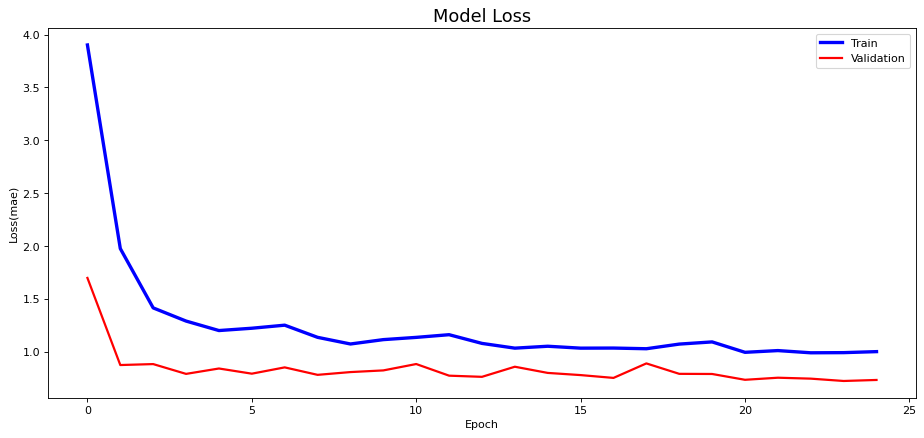

In [162]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

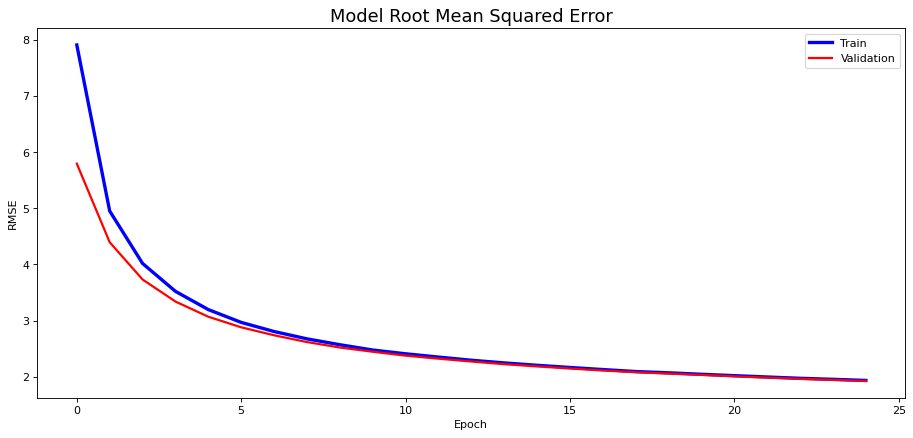

In [163]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r12['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r12['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

6/6 [==============================] - 0s 2ms/step


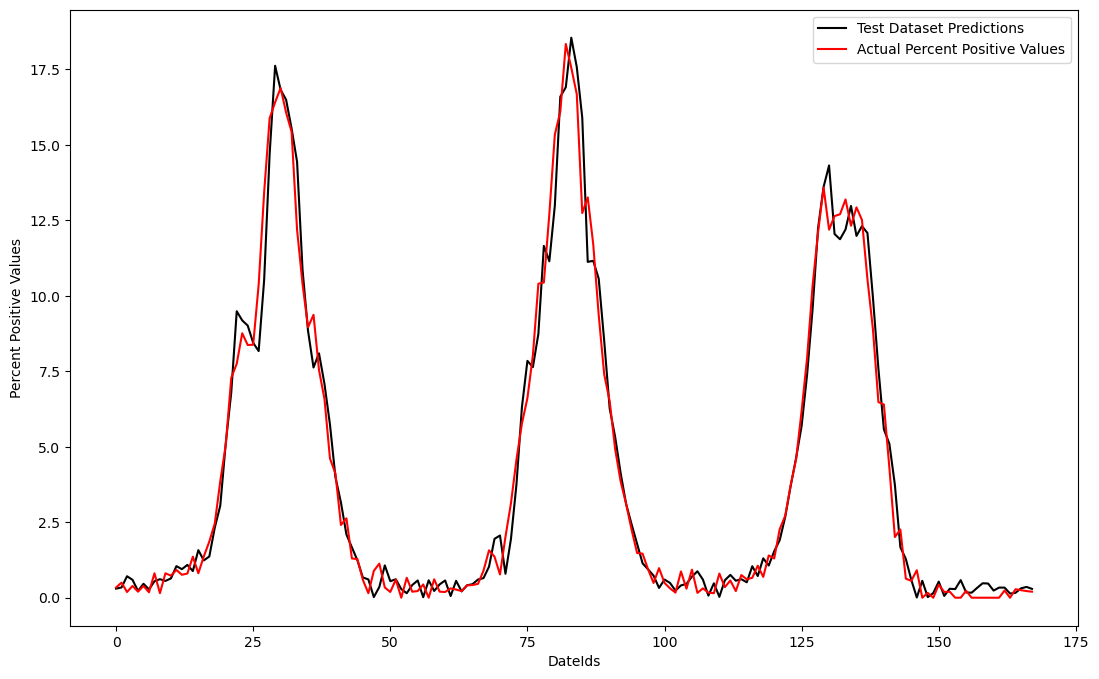

In [164]:
test_pred_r12 = optimum_model.predict(X_test_r12).flatten()
test_results_r12 = pd.DataFrame(data={'Test Predictions': test_pred_r12, 'Actual Percent Positive Values':y_test_r12.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r12['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r12['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [165]:
error_r12= mean_squared_error(y_test_r12, test_pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r12))

mae_r12 = mean_absolute_error(y_test_r12, test_pred_r12)
print("Mean Absolute Error: ", mae_r12)


RootMeanSquaredError:  0.7891788614052885
Mean Absolute Error:  0.5453990632113779


### SARIMA Model

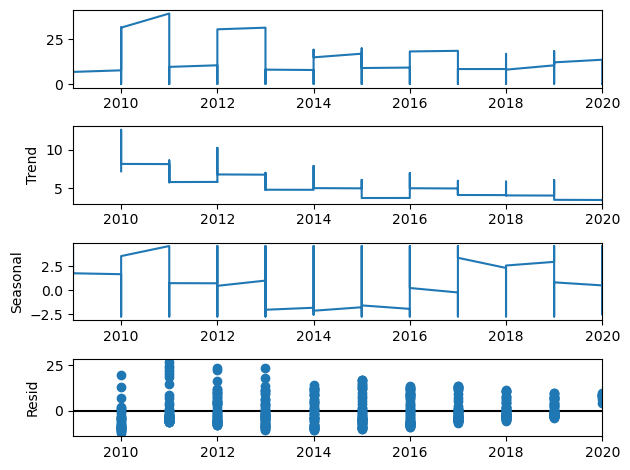

In [166]:
seasonal_decompose(df_r12, model='additive', period=60).plot();

In [167]:
adf_test(df_r12['RSV_PP'])

1. ADF :  -6.894339993682272
2. P-Value :  1.3307259114112681e-09
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression: 569
5. Critical Values :
	 1% :  -3.4418948967017475
	 5% :  -2.8666329082535222
	 10% :  -2.569482366838501
The series is stationary


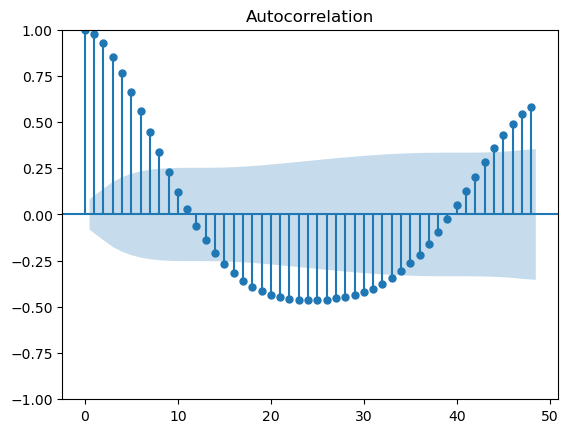

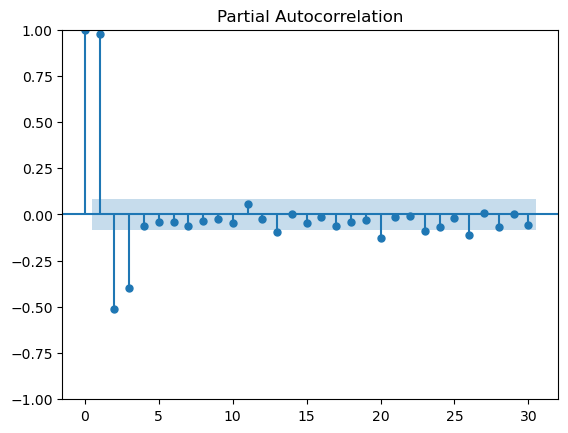

In [168]:
plot_acf(df_r12['RSV_PP'], lags=48);
plot_pacf(df_r12['RSV_PP'], lags=30);

In [169]:
result_df_r12 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r12['RSV_PP'])
result_df_r12

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 0, 1)",2102.172103
1,"(1, 1, 1, 0)",2103.125171
2,"(1, 1, 0, 0)",2122.703788
3,"(1, 1, 1, 1)",2125.381053
4,"(1, 0, 0, 1)",2170.972802
5,"(1, 0, 1, 0)",2172.909454
6,"(1, 0, 1, 1)",2204.377990
7,"(1, 0, 0, 0)",2204.526342
8,"(0, 1, 1, 1)",2702.618738
9,"(0, 1, 1, 0)",2806.144573


In [63]:
best_model_r12 = SARIMAX(df_r12['RSV_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 1, 4)).fit(dis=-1)
print(best_model_r12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            RSV_PP   No. Observations:                  573
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 4)   Log Likelihood               -1047.086
Date:                           Thu, 02 Feb 2023   AIC                           2102.172
Time:                                   22:07:22   BIC                           2119.576
Sample:                                        0   HQIC                          2108.961
                                           - 573                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9699      0.007    132.488      0.000       0.956       0.984
ma.L1          0.2871      0.030      9.711

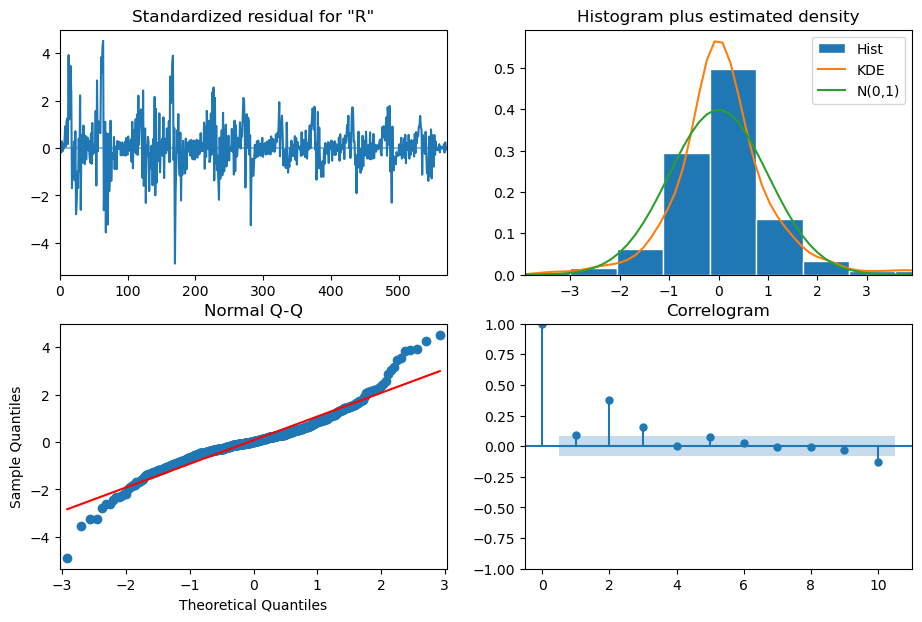

In [170]:
best_model_r12.plot_diagnostics(figsize=(11,7));

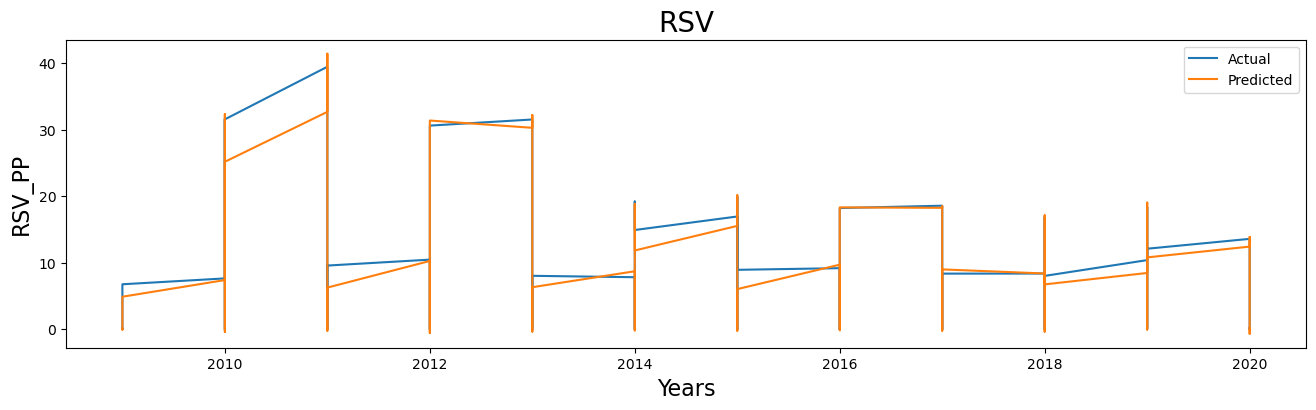

In [171]:
pred_r12 = best_model_r12.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r12['RSV_PP'], label="Actual")
plt.plot(pred_r12, label="Predicted")
plt.title('RSV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('RSV_PP', fontsize=16)
plt.legend()

In [172]:
error_r2= mean_squared_error(df_r12['RSV_PP'], pred_r12)
print("RootMeanSquaredError: ", np.sqrt(error_r2))

mae_r2 = mean_absolute_error(df_r12['RSV_PP'], pred_r12)
print("Mean Absolute Error: ", mae_r2)


RootMeanSquaredError:  1.499385913680934
Mean Absolute Error:  1.017498623062419


## **Adenovirus**

In [173]:
df_reg1_rv3 = df_reg1.loc[df_reg1['respiratory_virus'] == 'Adenovirus']
df_reg1_rv3

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
7310,2013-2014,05-10-2013,California,Adenovirus,3,266,1.13
7314,2013-2014,12-10-2013,California,Adenovirus,7,276,2.54
7318,2013-2014,19-10-2013,California,Adenovirus,4,356,1.12
7322,2013-2014,26-10-2013,California,Adenovirus,6,303,1.98
7326,2013-2014,02-11-2013,California,Adenovirus,9,345,2.61
...,...,...,...,...,...,...,...
9600,2019-2020,29-08-2020,California,Adenovirus,6,389,1.54
9606,2019-2020,05-09-2020,California,Adenovirus,1,347,0.29
9612,2019-2020,12-09-2020,California,Adenovirus,4,373,1.07
9618,2019-2020,19-09-2020,California,Adenovirus,9,402,2.24


In [174]:
df_r13 = df_reg1_rv3[['weekending', 'percent_positive']]
df_r13['Adeno_PP'] = df_r13['percent_positive']
df_r13 = df_r13.drop(['percent_positive'], axis = 1)
df_r13['Year'] = pd.DatetimeIndex(df_r13['weekending']).year
df_r13.head()

,weekending,Adeno_PP,Year
7310,05-10-2013,1.13,2013
7314,12-10-2013,2.54,2013
7318,19-10-2013,1.12,2013
7322,26-10-2013,1.98,2013
7326,02-11-2013,2.61,2013


In [175]:
df_r13['Adeno_PP'].describe()

count    365.000000
mean       2.604082
std        1.431647
min        0.220000
25%        1.610000
50%        2.290000
75%        3.240000
max        8.010000
Name: Adeno_PP, dtype: float64

In [176]:
df_r13.set_index('Year', drop = True, inplace = True)
df_r13 = df_r13.drop(['weekending'], axis = 1)
df_r13.head()

,Adeno_PP
Year,
2013,1.13
2013,2.54
2013,1.12
2013,1.98
2013,2.61


In [177]:
window_size = 5
X_r13, y_r13 = df_to_X_y(df_r13, window_size)
X_r13.shape, y_r13.shape

((360, 5, 1, 1), (360, 1))

In [178]:
X_train_r13, y_train_r13 = X_r13[:150], y_r13[:150]
X_val_r13, y_val_r13 = X_r13[150:250], y_r13[150:250]
X_test_r13, y_test_r13 = X_r13[250:], y_r13[250:]

X_train_r13.shape, y_train_r13.shape, X_test_r13.shape, y_test_r13.shape,  X_val_r13.shape, y_val_r13.shape

((150, 5, 1, 1), (150, 1), (110, 5, 1, 1), (110, 1), (100, 5, 1, 1), (100, 1))

In [179]:
# Tunner search
tuner.search(X_train_r13, y_train_r13, epochs = 10, validation_data = (X_val_r13, y_val_r13))

INFO:tensorflow:Oracle triggered exit


In [180]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r13 = optimum_model.fit(X_train_r13, y_train_r13, epochs = nb_epochs, validation_data = (X_val_r13, y_val_r13)).history


Epoch 1/25
5/5 [==============================] - 1s 37ms/step - loss: 1.5978 - root_mean_squared_error: 2.5342 - val_loss: 0.9445 - val_root_mean_squared_error: 1.8908
Epoch 2/25
5/5 [==============================] - 0s 10ms/step - loss: 0.9708 - root_mean_squared_error: 1.7440 - val_loss: 0.8118 - val_root_mean_squared_error: 1.5973
Epoch 3/25
5/5 [==============================] - 0s 11ms/step - loss: 0.9072 - root_mean_squared_error: 1.5348 - val_loss: 0.6940 - val_root_mean_squared_error: 1.4603
Epoch 4/25
5/5 [==============================] - 0s 11ms/step - loss: 0.7842 - root_mean_squared_error: 1.4098 - val_loss: 0.6923 - val_root_mean_squared_error: 1.3729
Epoch 5/25
5/5 [==============================] - 0s 11ms/step - loss: 0.8061 - root_mean_squared_error: 1.3460 - val_loss: 0.6989 - val_root_mean_squared_error: 1.3208
Epoch 6/25
5/5 [==============================] - 0s 11ms/step - loss: 0.8743 - root_mean_squared_error: 1.3087 - val_loss: 0.6975 - val_root_mean_squared_

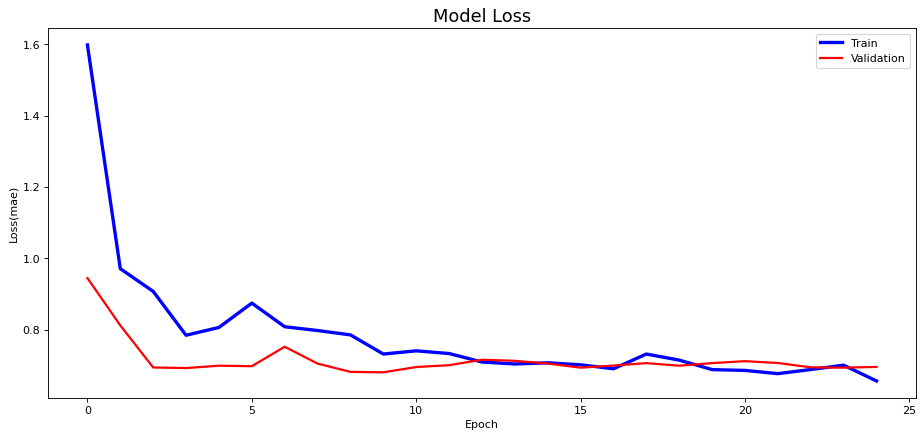

In [181]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

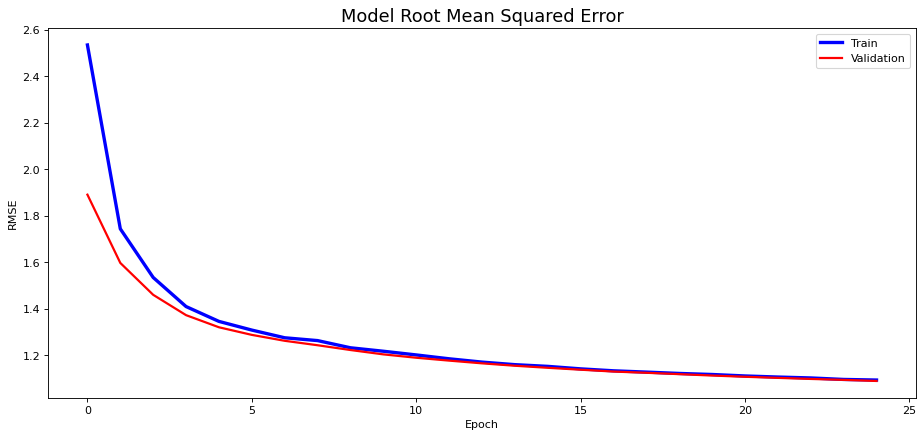

In [182]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r13['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r13['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Mean Squared Error', fontsize = 16)
ax.set_ylabel("RMSE")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

4/4 [==============================] - 0s 2ms/step


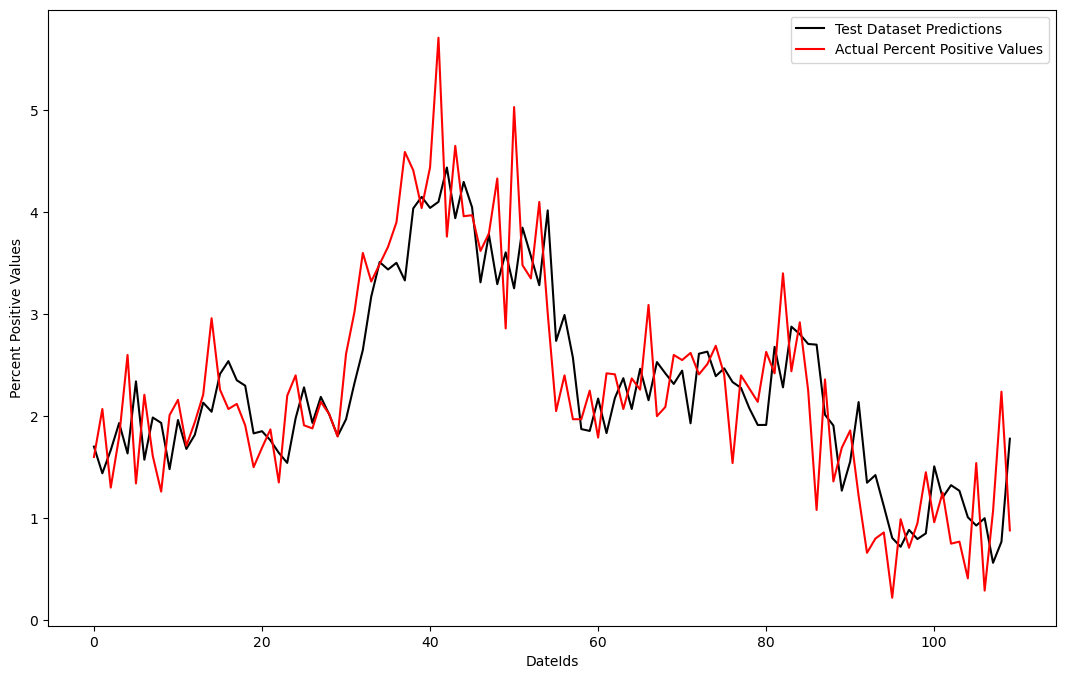

In [183]:
test_pred_r13 = optimum_model.predict(X_test_r13).flatten()
test_results_r13 = pd.DataFrame(data={'Test Predictions': test_pred_r13, 'Actual Percent Positive Values':y_test_r13.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r13['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r13['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [184]:
error_r13= mean_squared_error(y_test_r13, test_pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r13))

mae_r13 = mean_absolute_error(y_test_r13, test_pred_r13)
print("Mean Absolute Error: ", mae_r13)


RootMeanSquaredError:  0.5938853598379863
Mean Absolute Error:  0.4702328328002584


### SARIMA Model

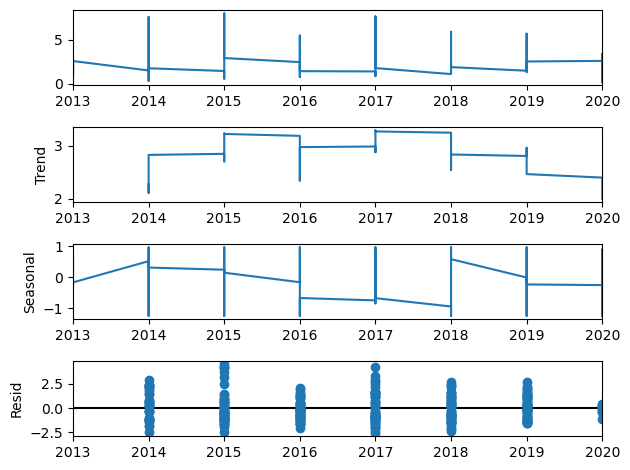

In [185]:
seasonal_decompose(df_r13, model='additive', period=60).plot();

In [186]:
adf_test(df_r13['Adeno_PP'])

1. ADF :  -4.5884527308028895
2. P-Value :  0.00013565009415123858
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 357
5. Critical Values :
	 1% :  -3.44880082033912
	 5% :  -2.869670179576637
	 10% :  -2.5711012838861036
The series is stationary


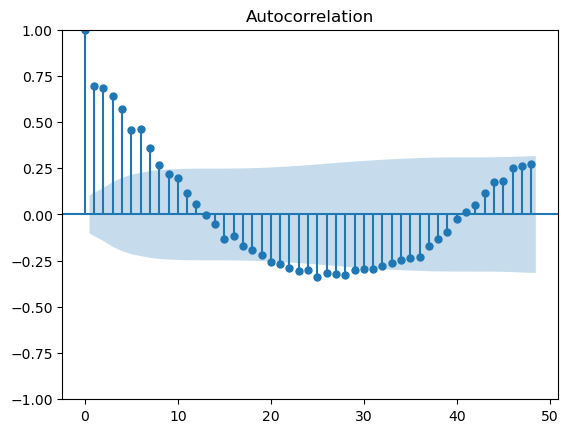

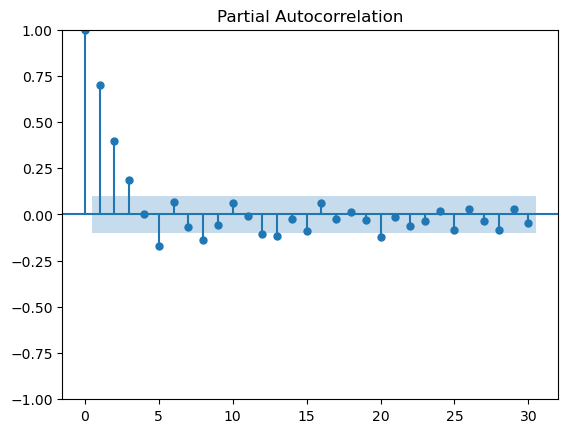

In [187]:
plot_acf(df_r13['Adeno_PP'], lags=48);
plot_pacf(df_r13['Adeno_PP'], lags=30);

In [188]:
result_df_r13 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r13['Adeno_PP'])
result_df_r13

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 1, 0, 1)",1007.564121
1,"(1, 1, 0, 0)",1007.849708
2,"(1, 1, 1, 0)",1007.984972
3,"(1, 1, 1, 1)",1011.638954
4,"(1, 0, 1, 1)",1073.113536
5,"(1, 0, 0, 1)",1101.375772
6,"(1, 0, 1, 0)",1101.621654
7,"(1, 0, 0, 0)",1103.969572
8,"(0, 1, 1, 1)",1162.096390
9,"(0, 1, 1, 0)",1181.530967


In [189]:
best_model_r13 = SARIMAX(df_r13['Adeno_PP'], order=(1, 0, 1), seasonal_order=(0, 0, 1, 4)).fit(dis=-1)
print(best_model_r13.summary())

                                     SARIMAX Results                                     
Dep. Variable:                          Adeno_PP   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(0, 0, 1, 4)   Log Likelihood                -499.782
Date:                           Fri, 03 Feb 2023   AIC                           1007.564
Time:                                   01:05:11   BIC                           1023.164
Sample:                                        0   HQIC                          1013.764
                                           - 365                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9840      0.008    124.609      0.000       0.969       0.999
ma.L1         -0.5275      0.034    -15.530

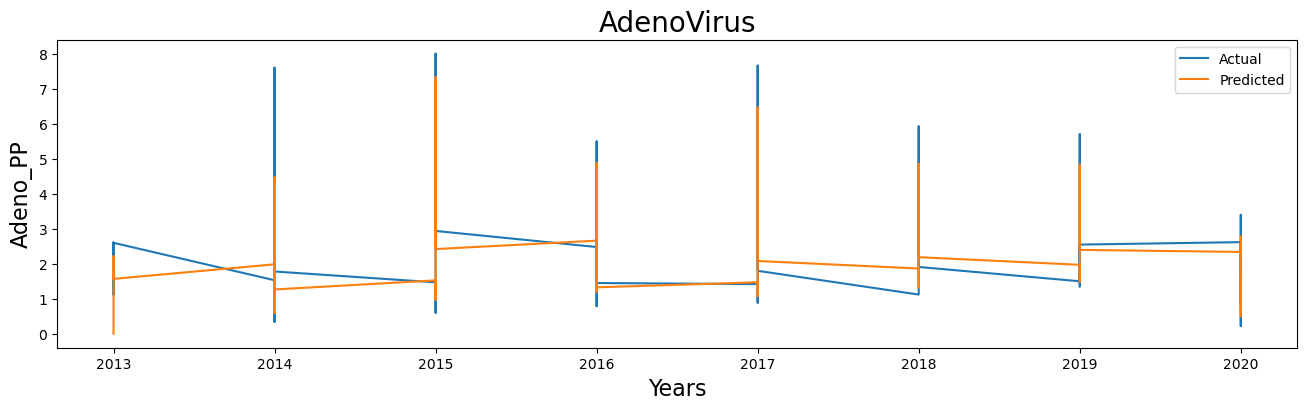

In [190]:
pred_r13 = best_model_r13.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r13['Adeno_PP'], label="Actual")
plt.plot(pred_r13, label="Predicted")
plt.title('AdenoVirus', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Adeno_PP', fontsize=16)
plt.legend()

In [191]:
error_r3= mean_squared_error(df_r13['Adeno_PP'], pred_r13)
print("RootMeanSquaredError: ", np.sqrt(error_r3))

mae_r3 = mean_absolute_error(df_r13['Adeno_PP'], pred_r13)
print("Mean Absolute Error: ", mae_r3)

RootMeanSquaredError:  0.9506502333824504
Mean Absolute Error:  0.6688635318665485


## **HMPV**

In [192]:
df_reg1_rv4 = df_reg1.loc[df_reg1['respiratory_virus'] == 'HMPV']
df_reg1_rv4

,season,weekending,region,respiratory_virus,number_positive,specimens_tested,percent_positive
9630,2013-2014,05-10-2013,California,HMPV,3,266,1.13
9634,2013-2014,12-10-2013,California,HMPV,2,276,0.72
9638,2013-2014,19-10-2013,California,HMPV,3,258,1.16
9642,2013-2014,26-10-2013,California,HMPV,2,292,0.68
9646,2013-2014,02-11-2013,California,HMPV,4,272,1.47
...,...,...,...,...,...,...,...
11913,2019-2020,29-08-2020,California,HMPV,0,389,0.00
11919,2019-2020,05-09-2020,California,HMPV,0,347,0.00
11925,2019-2020,12-09-2020,California,HMPV,0,373,0.00
11931,2019-2020,19-09-2020,California,HMPV,0,402,0.00


In [193]:
df_r14 = df_reg1_rv4[['weekending', 'percent_positive']]
df_r14['HMPV_PP'] = df_r14['percent_positive']
df_r14 = df_r14.drop(['percent_positive'], axis = 1)
df_r14['Year'] = pd.DatetimeIndex(df_r14['weekending']).year
df_r14.head()

,weekending,HMPV_PP,Year
9630,05-10-2013,1.13,2013
9634,12-10-2013,0.72,2013
9638,19-10-2013,1.16,2013
9642,26-10-2013,0.68,2013
9646,02-11-2013,1.47,2013


In [194]:
df_r14['HMPV_PP'].describe()

count    365.000000
mean       2.443260
std        2.704417
min        0.000000
25%        0.440000
50%        1.160000
75%        3.800000
max       12.180000
Name: HMPV_PP, dtype: float64

In [195]:
df_r14.set_index('Year', drop = True, inplace = True)
df_r14 = df_r14.drop(['weekending'], axis = 1)
df_r14.head()

,HMPV_PP
Year,
2013,1.13
2013,0.72
2013,1.16
2013,0.68
2013,1.47


In [196]:
window_size = 5
X_r14, y_r14 = df_to_X_y(df_r14, window_size)
X_r14.shape, y_r14.shape

((360, 5, 1, 1), (360, 1))

In [197]:
X_train_r14, y_train_r14 = X_r14[:135], y_r14[:135]
X_val_r14, y_val_r14 = X_r14[135:250], y_r14[135:250]
X_test_r14, y_test_r14 = X_r14[250:], y_r14[250:]

X_train_r14.shape, y_train_r14.shape, X_test_r14.shape, y_test_r14.shape, X_val_r14.shape, y_val_r14.shape

((135, 5, 1, 1), (135, 1), (110, 5, 1, 1), (110, 1), (115, 5, 1, 1), (115, 1))

In [198]:
# Tunner search
tuner.search(X_train_r14, y_train_r14, epochs = 10, validation_data = (X_val_r14, y_val_r14))

INFO:tensorflow:Oracle triggered exit


In [199]:
best_hps=tuner.get_best_hyperparameters()[0]
# Build model on optimum paramters
optimum_model = tuner.hypermodel.build(best_hps)
# Train the hypertuned model
nb_epochs = 25
history_r14 = optimum_model.fit(X_train_r14, y_train_r14, epochs = nb_epochs, validation_data = (X_val_r14, y_val_r14) ).history


Epoch 1/25
5/5 [==============================] - 1s 37ms/step - loss: 2.7949 - root_mean_squared_error: 3.9846 - val_loss: 1.6267 - val_root_mean_squared_error: 3.4074
Epoch 2/25
5/5 [==============================] - 0s 12ms/step - loss: 1.3143 - root_mean_squared_error: 3.0485 - val_loss: 1.0511 - val_root_mean_squared_error: 2.7368
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 1.2112 - root_mean_squared_error: 2.5826 - val_loss: 0.6810 - val_root_mean_squared_error: 2.3971
Epoch 4/25
5/5 [==============================] - 0s 11ms/step - loss: 0.8673 - root_mean_squared_error: 2.2556 - val_loss: 0.6179 - val_root_mean_squared_error: 2.1458
Epoch 5/25
5/5 [==============================] - 0s 11ms/step - loss: 0.7672 - root_mean_squared_error: 2.0475 - val_loss: 0.6362 - val_root_mean_squared_error: 1.9774
Epoch 6/25
5/5 [==============================] - 0s 10ms/step - loss: 0.7613 - root_mean_squared_error: 1.9230 - val_loss: 0.6089 - val_root_mean_squared_

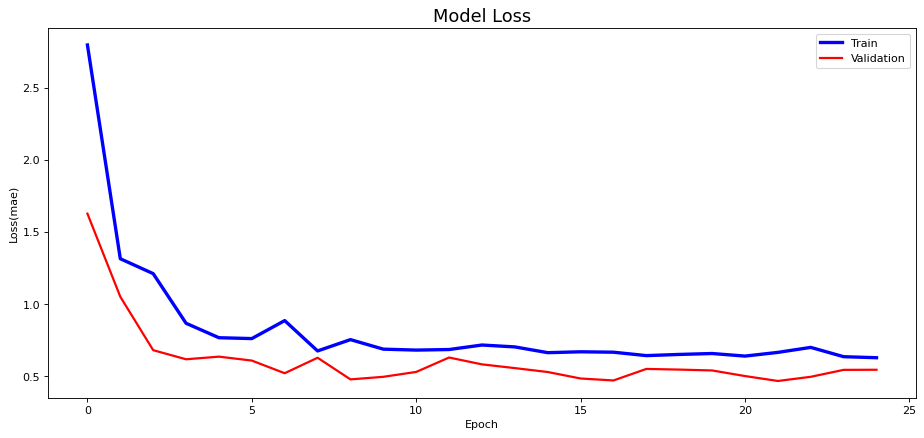

In [200]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['loss'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_loss'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Loss', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_xlabel("Epoch")
ax.legend(loc='upper right')
plt.show()

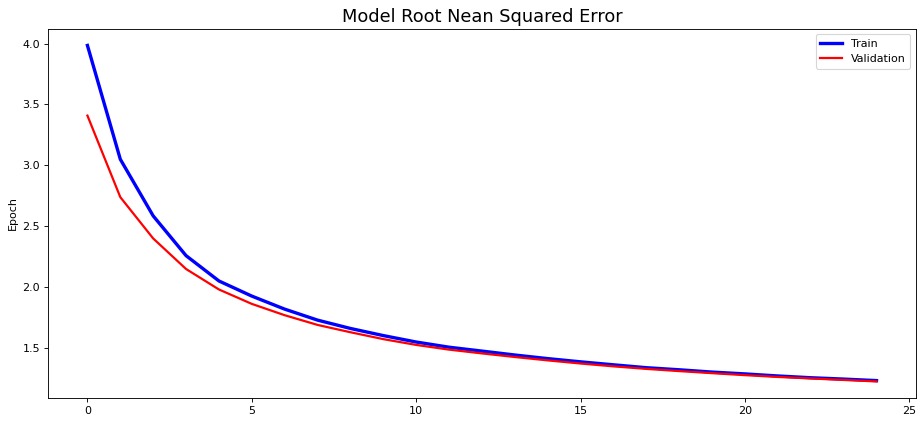

In [201]:
fig, ax = plt.subplots(figsize = (14, 6), dpi = 80)
ax.plot(history_r14['root_mean_squared_error'], 'b', label = 'Train', linewidth = 3)
ax.plot(history_r14['val_root_mean_squared_error'], 'r', label = 'Validation', linewidth = 2)
ax.set_title('Model Root Nean Squared Error', fontsize = 16)
ax.set_ylabel("Loss(mae)")
ax.set_ylabel("Epoch")
ax.legend(loc='upper right')
plt.show()

4/4 [==============================] - 0s 2ms/step


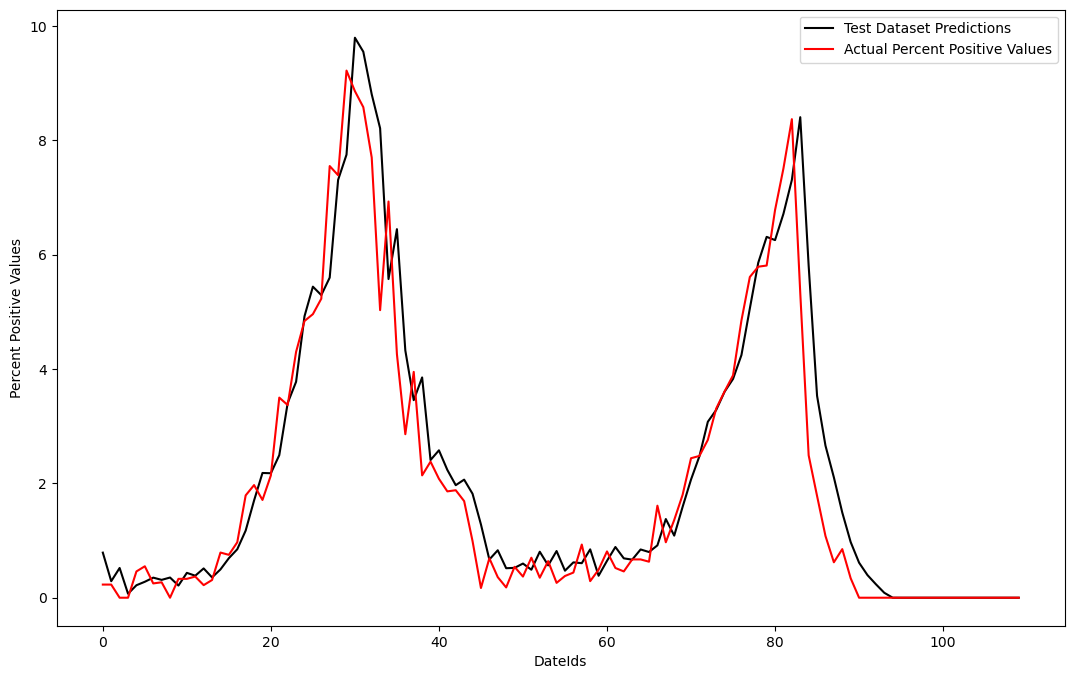

In [202]:
test_pred_r14 = optimum_model.predict(X_test_r14).flatten()
test_results_r14 = pd.DataFrame(data={'Test Predictions': test_pred_r14, 'Actual Percent Positive Values':y_test_r14.flatten()})
plt.figure(figsize = (13, 8))
plt.plot(test_results_r14['Test Predictions'], label = 'Test Dataset Predictions', color = 'black')
plt.plot(test_results_r14['Actual Percent Positive Values'], label = 'Actual Percent Positive Values', color = 'red')
plt.xlabel('DateIds')
plt.ylabel('Percent Positive Values')
plt.legend()
plt.show()

In [203]:
error_r14= mean_squared_error(y_test_r14, test_pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r14))

mae_r14 = mean_absolute_error(y_test_r14, test_pred_r14)
print("Mean Absolute Error: ", mae_r14)


RootMeanSquaredError:  0.8096310155306361
Mean Absolute Error:  0.4735967960113829


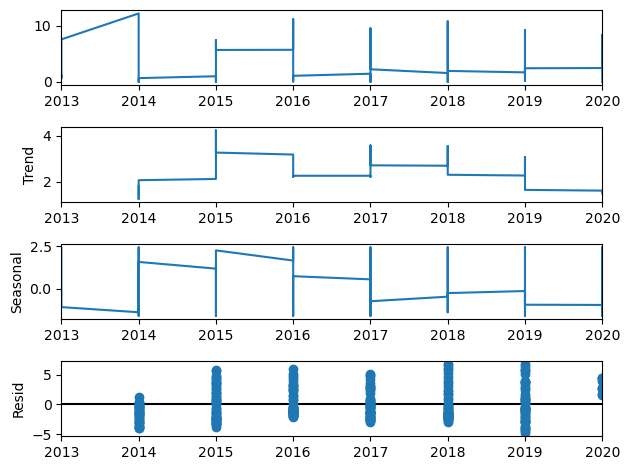

In [204]:
seasonal_decompose(df_r14, model='additive', period=60).plot();

In [205]:
adf_test(df_r14['HMPV_PP'])

1. ADF :  -4.878047192134997
2. P-Value :  3.847311392069067e-05
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression: 359
5. Critical Values :
	 1% :  -3.4486972813047574
	 5% :  -2.8696246923288418
	 10% :  -2.571077032068342
The series is stationary


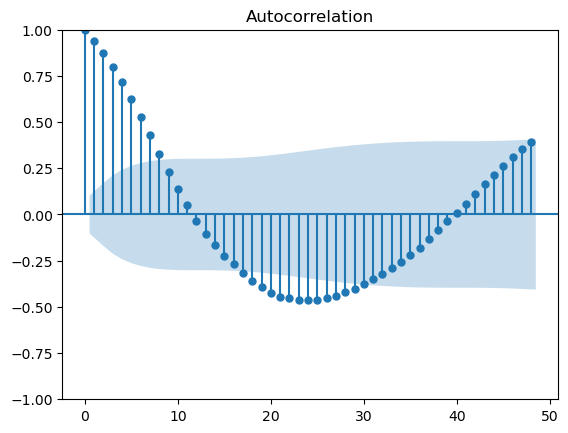

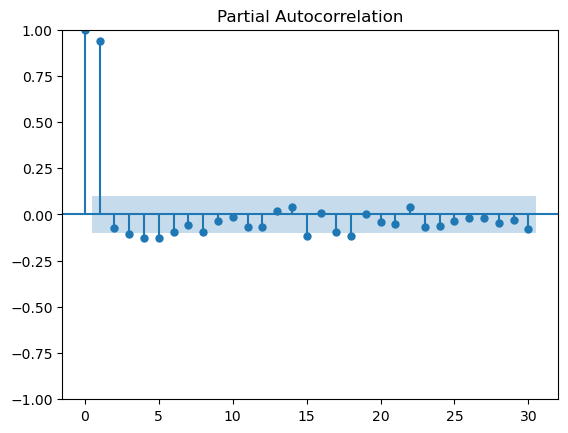

In [206]:
plot_acf(df_r14['HMPV_PP'], lags=48);
plot_pacf(df_r14['HMPV_PP'], lags=30);

In [207]:
result_df_r14 = optimize_SARIMA(parameters_list, 0, 0, 4, df_r14['HMPV_PP'])
result_df_r14

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 0, 1)",986.203305
1,"(1, 0, 1, 0)",986.352949
2,"(1, 0, 0, 0)",987.538485
3,"(1, 1, 0, 1)",987.601498
4,"(1, 1, 1, 0)",987.733650
5,"(1, 0, 1, 1)",988.193007
6,"(1, 1, 0, 0)",988.676978
7,"(1, 1, 1, 1)",989.591358
8,"(0, 1, 1, 1)",1234.121246
9,"(0, 1, 1, 0)",1240.355342


In [208]:
best_model_r14 = SARIMAX(df_r14['HMPV_PP'], order=(1, 0, 0), seasonal_order=(0, 0, 1, 4)).fit(dis=-1)
print(best_model_r14.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             HMPV_PP   No. Observations:                  365
Model:             SARIMAX(1, 0, 0)x(0, 0, [1], 4)   Log Likelihood                -490.102
Date:                             Fri, 03 Feb 2023   AIC                            986.203
Time:                                     01:05:50   BIC                            997.903
Sample:                                          0   HQIC                           990.853
                                             - 365                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9592      0.009    112.347      0.000       0.942       0.976
ma.S.L4        0.0989      

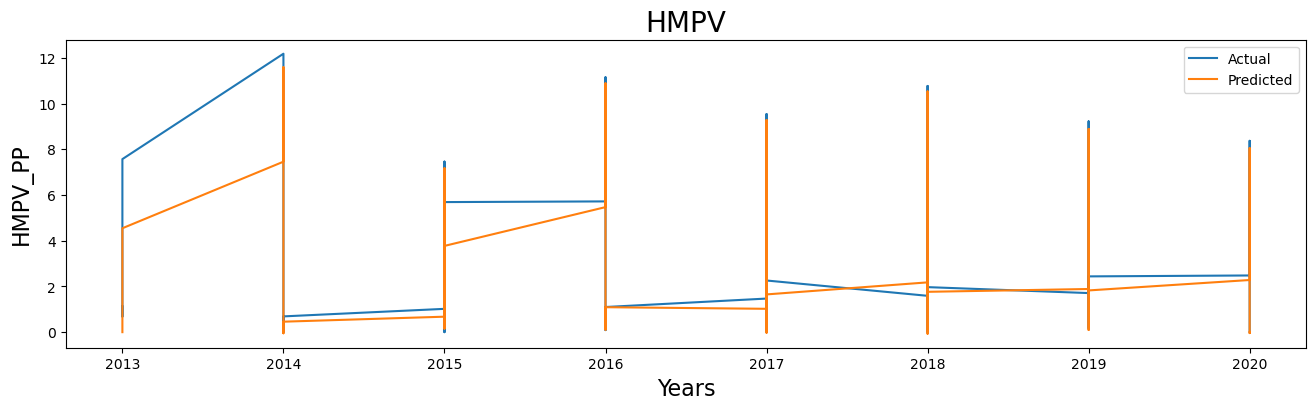

In [209]:
pred_r14 = best_model_r14.predict()
plt.figure(figsize=(16,4))
plt.plot(df_r14['HMPV_PP'], label="Actual")
plt.plot(pred_r14, label="Predicted")
plt.title('HMPV', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('HMPV_PP', fontsize=16)
plt.legend()

In [210]:
error_r4= mean_squared_error(df_r14['HMPV_PP'], pred_r14)
print("RootMeanSquaredError: ", np.sqrt(error_r4))

mae_r4 = mean_absolute_error(df_r14['HMPV_PP'], pred_r14)
print("Mean Absolute Error: ", mae_r4)

RootMeanSquaredError:  0.9249639225873737
Mean Absolute Error:  0.5964753530912489
